In [3]:
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
import cv2

In [443]:
# name of the input file
imname = './data/cathedral.jpg'

# read in the image
im = cv2.imread(imname, cv2.IMREAD_GRAYSCALE)

# norm_im = cv2.normalize(im_adj, None, 0, 255, cv2.NORM_MINMAX)
# norm_im = np.uint8(norm_im)

In [444]:
# compute the height of each part (just 1/3 of total)
height = np.floor(im.shape[0] / 3.0).astype(int)

# separate color channels
b = im[:height]
g = im[height: 2*height]
r = im[2*height: 3*height]

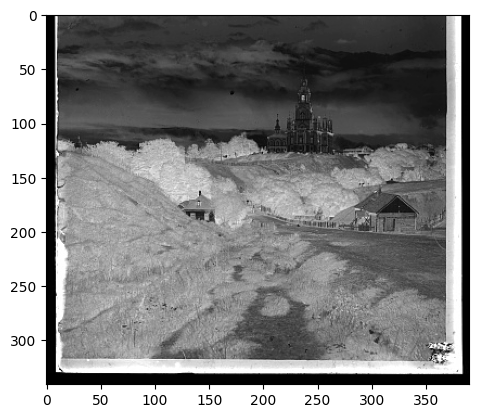

In [445]:
plt.imshow(r, cmap='gray_r')

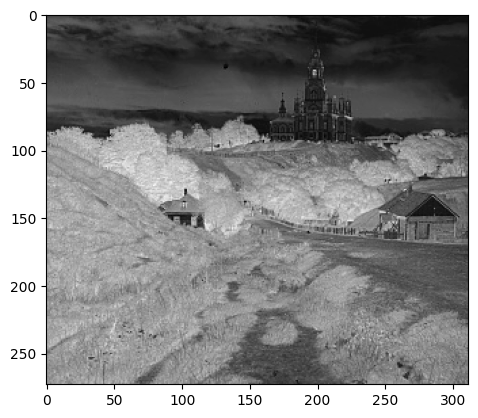

In [446]:
v_border = int(r.shape[0]*0.1)
h_border = int(r.shape[1]*0.1)
r_cropped = r[v_border:-v_border, h_border:-h_border]
b_cropped = b[v_border:-v_border, h_border:-h_border]
g_cropped = g[v_border:-v_border, h_border:-h_border]
rgb = np.array([r_cropped, g_cropped, b_cropped])
plt.imshow(rgb[0], cmap='gray_r')

In [447]:
rgb_adj = np.empty_like(rgb)
for i in range(0, 3):
    img_adj = 255 - rgb[i]
    img_adj = cv2.convertScaleAbs(img_adj, alpha = 1.5, beta = 0)
    img_adj = 255 - img_adj
    
    black_point = np.percentile(img_adj, 5)
    img_adj = np.clip(img_adj - black_point, 0, 255).astype(np.uint8)
    
    rgb_adj[i] = img_adj

In [448]:
rgb_adj[0].shape

(273, 312)

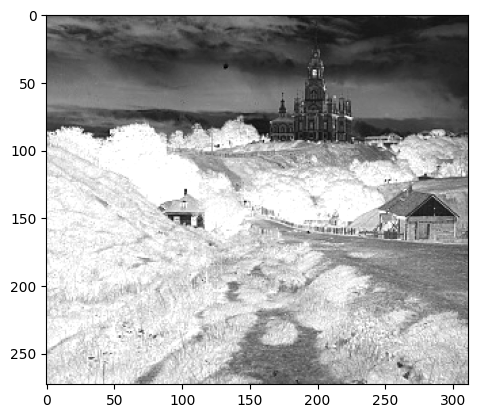

In [449]:
plt.imshow(rgb_adj[0], cmap='gray_r')

In [496]:
low = 100
high = 300
lines = np.empty_like(rgb_adj)
kernel = np.floor(rgb[0].shape[0] * 0.01).astype(int)
kernel = kernel + 1 if kernel % 2 == 0 else kernel
print(kernel)
for i in range(0, lines.shape[0]):
    edge = cv2.Canny(image=rgb_adj[i], threshold1=low, threshold2=high)
    if kernel > 5:
        lines[i] = cv2.GaussianBlur(edge, (kernel, kernel), 0)
    else:
        lines[i] = edge

3


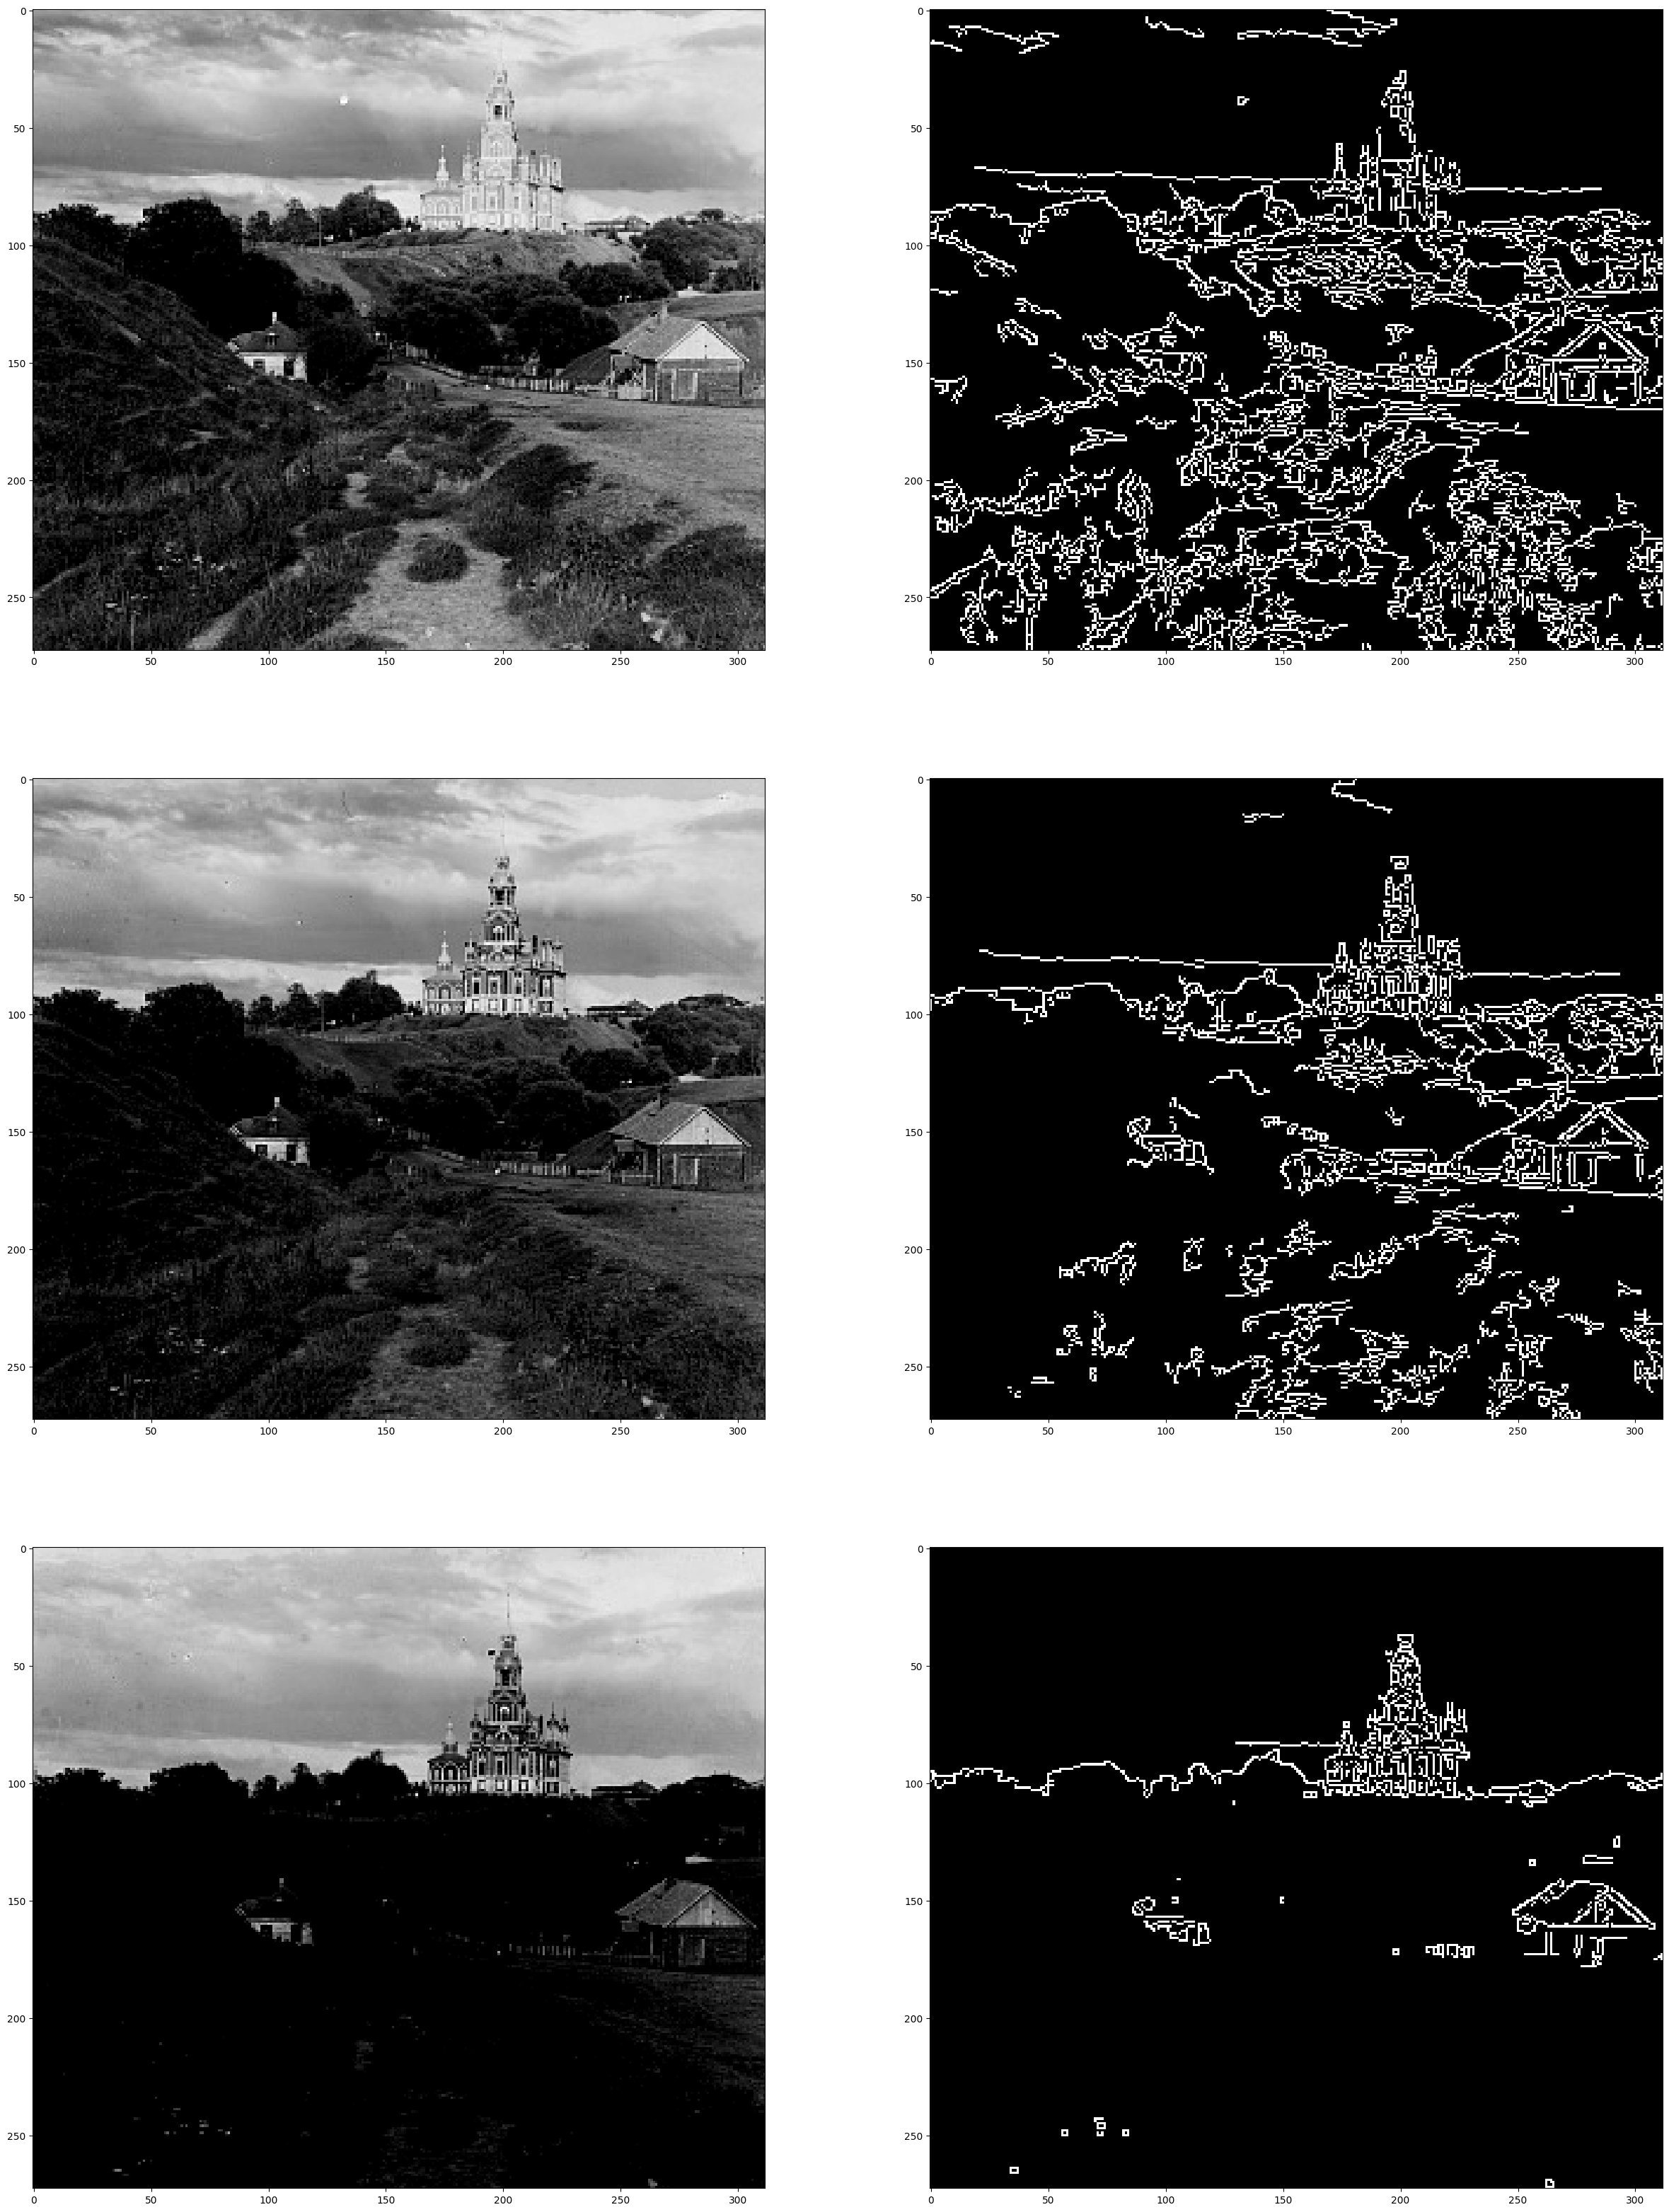

In [497]:
fig, axs = plt.subplots(3, 2, figsize=(30, 40))

for i in range(0, lines.shape[0]):
    axs[i,0].imshow(rgb_adj[i], cmap='gray')
    axs[i,1].imshow(lines[i], cmap='gray')

In [498]:
lineSum = np.sum(lines, axis=(1,2))
sortedLineSumIdx = np.flip(np.argsort(lineSum))
padding = np.floor(lines.shape[1]*0.05).astype(int)
paddedMaxLine = np.pad(lines[sortedLineSumIdx[0]], padding, mode='constant', constant_values=0)

[0 1 2]


13
(299, 338)


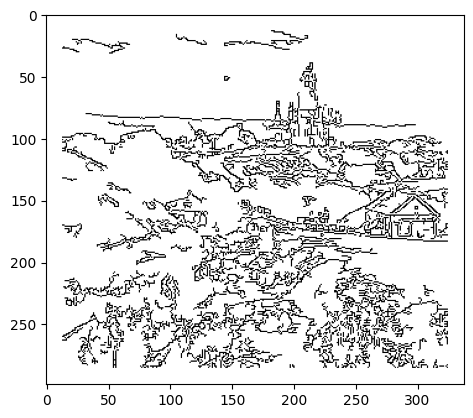

In [506]:
print(padding)
print(paddedMaxLine.shape)
plt.imshow(paddedMaxLine, cmap='gray_r')

[(12, 6), (10, 1)]


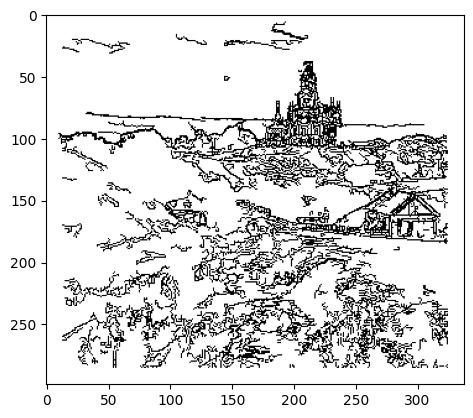

In [531]:
maxLine = paddedMaxLine
totalPadding = padding * 2
paddingOffset = []

for i in range(1,3):
    maxOverlapSum = 0
    maxOverlap = None
    maxX, maxY = 0, 0
    for y in range(0, totalPadding):
        for x in range(0, totalPadding):
            paddedLine = np.pad(lines[i], ((y, totalPadding-y), (x, totalPadding-x)), mode='constant', constant_values=1)
            # print(lines[i].shape)
            # print(paddedLine.shape)
            imgOverlap = np.logical_and(maxLine, paddedLine).astype(np.uint8)
            imgOverlapSum = np.sum(imgOverlap)
            # print(imgOverlapSum)
            if imgOverlapSum > maxOverlapSum:
                maxOverlap = imgOverlap
                maxOverlapSum = imgOverlapSum
                maxX, maxY = x, y
    paddingOffset.append((maxX, maxY))
    color = np.pad(lines[i], ((maxY, totalPadding-maxY), (maxX, totalPadding-maxX)), mode='constant', constant_values=0)
    combinedImg = np.logical_or(maxLine, color).astype(np.uint8)
    maxLine = combinedImg
    plt.imshow(maxLine, cmap='gray_r')
    
print(paddingOffset)

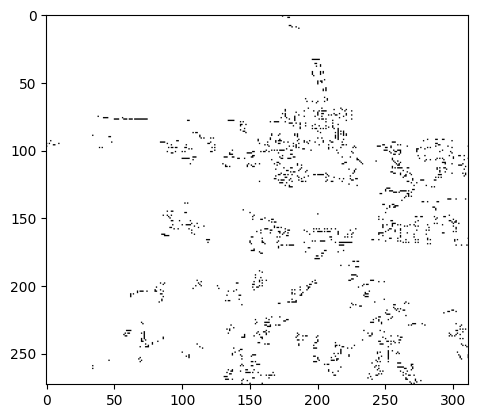

In [502]:
combined = np.logical_and(lines[0], lines[1]).astype(np.uint8)
plt.imshow(combined, cmap='gray_r')

In [46]:
colored = np.stack((r, b, g), axis=2)

In [47]:
colored.shape

(341, 390, 3)

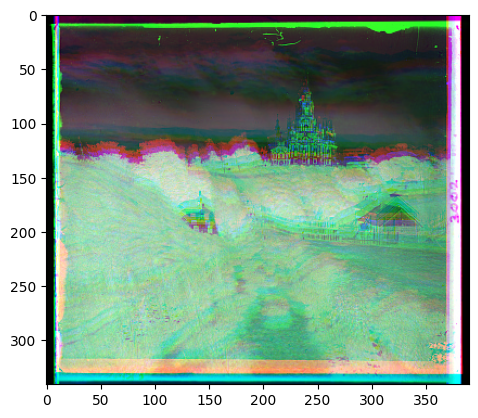

In [48]:
plt.imshow(colored)